In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use("seaborn")

In [58]:
toy_dataset = [[2.7810836,2.550537003,1],
           [1.465489372,2.362125076,1],
           [3.396561688,4.400293529,1],
           [1.38807019,1.850220317,1],
           [3.06407232,3.005305973,1],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]]
label = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [59]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [56]:
def make_prediction(w, x, classify=False):
    z = sigmoid(np.dot(w, x))
    if classify:
        return int(z > 0.5)
    else:
        return z

In [60]:
weight = [-0.4, 0.9, -2]
prediction = []
for data in toy_dataset:
    prediction.append(make_prediction(weight, data))
prediction

[0.30641144433334677,
 0.38691864774881735,
 0.6460313085580067,
 0.2911036797174362,
 0.37265266628218413,
 0.07124790251471112,
 0.09507272969783158,
 0.04011429816144662,
 0.003374831812265443,
 0.12877922917101722]

In [61]:
def cross_entropy(y_true, y_pred):
    data_num = len(y_true)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    total = - np.sum(np.multiply(y_true, np.log(y_pred)) + np.multiply((1 - y_true), np.log(1 - y_pred)))
    return total / data_num

In [62]:
cross_entropy(label, prediction)

1.8655772713676502

In [104]:
def gradient_descent(alpha, epoch, weight, X, y, threshold, print_option=True, get_cost=False):
    y_pred = np.array([make_prediction(weight, x) for x in X])
    data_num = len(y)
    cost = []
    for i in range(epoch):
        dw = np.dot((y_pred - y), X) / data_num
        weight = weight - alpha * dw
        y_pred = np.array([make_prediction(weight, x) for x in X])
        new_cost = cross_entropy(y, y_pred)
        cost.append(new_cost)
        if print_option and i%10==0: print("Iteration {0}, Cost: {1}".format(i, new_cost))
        if i > 3 and cost[-2] - cost[-1] < threshold:
            break
    if get_cost:
        return cost
    else:
        return weight

In [71]:
gradient_descent(0.1, 200, weight, toy_dataset, label, 0.0001)

Iteration 0, Cost: 1.182528373826317
Iteration 10, Cost: 0.431316684693242
Iteration 20, Cost: 0.2631905233665576
Iteration 30, Cost: 0.19400885339305013
Iteration 40, Cost: 0.15552441379609738
Iteration 50, Cost: 0.1306481850308255
Iteration 60, Cost: 0.11310499093598858
Iteration 70, Cost: 0.10000286631130835
Iteration 80, Cost: 0.08980916134701174
Iteration 90, Cost: 0.0816308506565904
Iteration 100, Cost: 0.07491036607639494
Iteration 110, Cost: 0.0692806609956054
Iteration 120, Cost: 0.06448974435910722
Iteration 130, Cost: 0.06035859361581518
Iteration 140, Cost: 0.05675635564876955
Iteration 150, Cost: 0.053585058580496114
Iteration 160, Cost: 0.050769822810558876
Iteration 170, Cost: 0.04825238756174102
Iteration 180, Cost: 0.04598670906788792
Iteration 190, Cost: 0.04393589382823838


array([ 1.45236701, -1.44043889, -2.5655978 ])

In [98]:
def logistic_regression(training_set, label, test_set, alpha, epoch, threshold=0.0001, print_option=False, get_cost=False):
    weight = np.random.rand(len(training_set[0]))
    if get_cost:
        cost = gradient_descent(alpha, epoch, weight, training_set, label, threshold, print_option, get_cost)
        return cost
    else:
        new_weight = gradient_descent(alpha, epoch, weight, training_set, label, threshold, print_option)
        prediction = [make_prediction(new_weight, instance, classify=True) for instance in test_set]
        return np.array(prediction)

In [86]:
from numpy import loadtxt
from urllib.request import urlopen
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = loadtxt(raw_data, delimiter=",")
X, y = np.array([np.append(x, 1) for x in dataset[:,:-1]]), dataset[:, -1]

In [87]:
X.shape

(1372, 5)

In [88]:
y.shape

(1372,)

In [89]:
def my_train_test_split(X, y, test_size, random_state):
    data_num = len(y)
    test_num = int(test_size * data_num)
    np.random.seed(random_state)
    index = np.random.permutation(data_num)
    X_train = X[index[:-test_num]]
    X_test = X[index[-test_num:]]
    y_train = y[index[:-test_num]]
    y_test = y[index[-test_num:]]
    return X_train, X_test, y_train, y_test

In [90]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y, 0.2, 42)

In [99]:
y_pred = logistic_regression(X_train, y_train, X_test, 0.1, 1000, threshold=0.00001, print_option=True)

Iteration 0, Cost: 2.232513496007435
Iteration 10, Cost: 0.33372990053439255
Iteration 20, Cost: 0.17885208941755643
Iteration 30, Cost: 0.1420408456173985
Iteration 40, Cost: 0.12415522296071413
Iteration 50, Cost: 0.11299177272188658
Iteration 60, Cost: 0.10508543273400184
Iteration 70, Cost: 0.09904792859988497
Iteration 80, Cost: 0.094203962970252
Iteration 90, Cost: 0.09018083593986183
Iteration 100, Cost: 0.08675364333159424
Iteration 110, Cost: 0.0837773144975996
Iteration 120, Cost: 0.08115330743286399
Iteration 130, Cost: 0.07881186219255931
Iteration 140, Cost: 0.07670189851223377
Iteration 150, Cost: 0.07478494837113948
Iteration 160, Cost: 0.07303134654398982
Iteration 170, Cost: 0.07141774769212436
Iteration 180, Cost: 0.0699254554957715
Iteration 190, Cost: 0.0685392667201754
Iteration 200, Cost: 0.06724665195807188
Iteration 210, Cost: 0.06603716248106602
Iteration 220, Cost: 0.06490199258543515
Iteration 230, Cost: 0.0638336511519708
Iteration 240, Cost: 0.0628257113795

In [100]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [93]:
y_test

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0.

In [133]:
def plot_loss(alpha, epoch):
    for rate in alpha:
        cost = logistic_regression(X_train, y_train, X_test, rate, epoch, threshold=0.00001, get_cost=True)
        iter_num = range(len(cost))
        plt.scatter(iter_num, cost)
    plt.xlabel("Number of Iterations"); plt.ylabel("Cross Entropy Loss")
    plt.show()

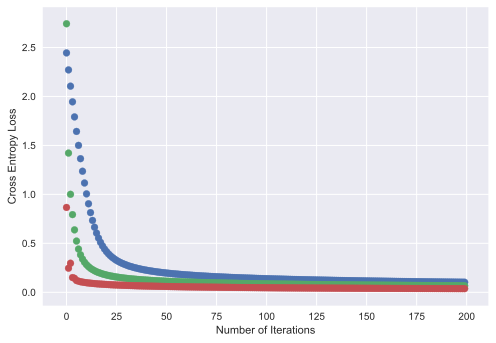

In [134]:
epoch = 200
alpha_lst = [0.05, 0.1, 0.5]
plot_loss(alpha_lst, epoch)

In [94]:
def accuracy_score(y_true, y_pred):
    count = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            count += 1
    return count/len(y_true)

In [95]:
accuracy_score(y_pred, y_test)

0.9927007299270073

In [142]:
def plot_accuracy(alpha, epoch):
    accuracy = []
    iter_range = range(epoch)
    for iter_num in iter_range:
        y_hat = logistic_regression(X_train, y_train, X_test, alpha, iter_num)
        accuracy.append(accuracy_score(y_hat, y_test))
    plt.plot(iter_range, accuracy, color="skyblue")
    plt.show()

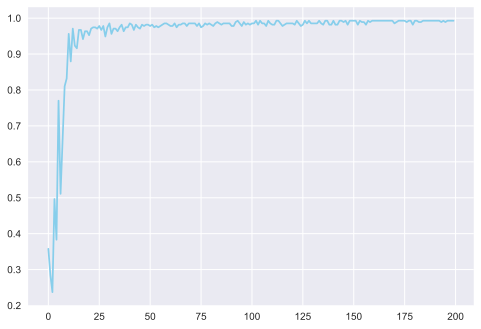

In [143]:
plot_accuracy(0.1, 200)

...
https://towardsdatascience.com/logistic-regression-from-very-scratch-ea914961f320
https://github.com/nikadeap/Gradient-Descent-Algorithm-for-Logistic-Regression/blob/master/GradientDescent.ipynb
https://en.wikipedia.org/wiki/Cross_entropy
bernoulli distribution cross entropy yields the loss function formula